In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;

sns.set()

Randomly generate 100 points belonging to a 2D Gaussian, plot the points.

Text(0.5, 1.0, 'Gaussian Generative Model P(X)')

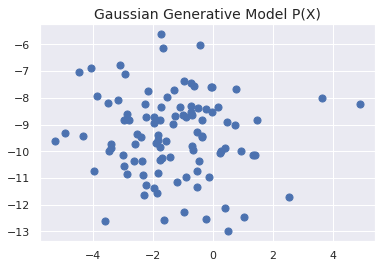

In [ ]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=100, n_features=2, centers=1, random_state=2, cluster_std=1.5)
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], s=50)
ax.set_title('Gaussian Generative Model P(X)', size=14)

TODO - Fit the data X to a Gaussian using sklearn.mixture.GaussianMixture. Print the calculated mean and covariance.

In [ ]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=1, covariance_type='full', random_state=0)
model.fit(X)

mu = model.means_[0]
cov = model.covariances_[0]

print("Mean: ", mu, ", covariance: ", cov)

Mean:  [-1.34455235 -9.39684246] , covariance:  [[ 2.90753346 -0.1656239 ]
 [-0.1656239   2.36095868]]


TODO - Generate 10 new samples from the fitted model

In [ ]:
X_sample = model.sample(n_samples=10)[0]
print(X_sample)

[[ -4.10074511  -7.9947268 ]
 [ -2.04729967  -5.66065173]
 [ -4.8359472   -9.96522026]
 [ -2.97917574  -9.17926967]
 [ -1.00561224  -8.84292395]
 [ -0.98765896  -7.19928139]
 [ -2.55447438  -8.8666192 ]
 [ -1.94267676  -8.70264966]
 [ -3.90165732  -9.00654262]
 [ -2.21240269 -10.50357631]]


Make the contour plot of the Gaussian model based on calculated parameteres. Add generated samples to the plot.

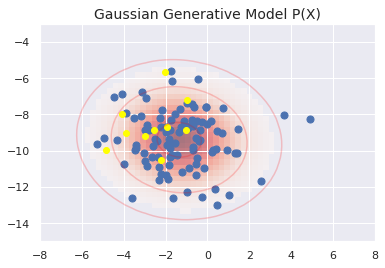

In [ ]:
def gaussian(X, mu, cov):
    P = np.zeros((X.shape[0],), dtype=float)
    N = (1. / (np.sqrt((2 * np.pi)**2 * np.linalg.det(cov))))
    for c, x in enumerate(X):
      x_m = (x - mu)
      P[c] = N * np.exp(-0.5 * (x_m.T @ np.linalg.inv(cov) @ x_m))
    return P

xlim = (-8, 8)
ylim = (-15, -3)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

P = gaussian(Xgrid, mu, cov)

Pm = np.ma.masked_array(P, P < 0.0018)

fig, ax = plt.subplots()
# Plot original data
ax.scatter(X[:, 0], X[:, 1], s=50)
ax.set_title('Gaussian Generative Model P(X)', size=14)
# Contour plot of the model
colour = 'red'
ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=colour.title() + 's')
ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.001, 0.01, 0.05, 0.09],
               colors= colour, alpha=0.2)
ax.set(xlim=xlim, ylim=ylim)

# Adding generated data
ax.scatter(X_sample[:, 0], X_sample[:, 1], c='yellow')

Generate randomly 100 test points (uniformly, independently of Gaussian)

In [ ]:
# Pseudo-random generator
rng = np.random.RandomState(0)

In [ ]:
Xnew = rng.rand(1000, 2)

# Move and spread out the points
Xnew *= np.array([16,12])
Xnew += np.array([-8,-15])

TODO - Print the probabilities of test points belonging to the fitted model.




In [ ]:
probs = gaussian(Xnew, mu, cov)
print(probs)

[3.62598764e-03 1.01007534e-02 2.26243269e-02 2.27394413e-04
 1.06125752e-07 9.46070355e-05 2.52391227e-05 2.07862184e-06
 1.95917677e-06 6.46872844e-07 7.27914201e-10 2.55893272e-03
 6.15639772e-04 3.85416942e-06 3.49965795e-02 1.52248039e-03
 4.05640594e-02 3.75967216e-05 4.86785258e-03 3.92772728e-08
 5.10388719e-02 1.96495028e-05 8.35479271e-04 2.05844586e-04
 2.67745407e-02 2.11796481e-02 1.40047467e-09 3.90195191e-04
 1.58595887e-03 1.25899840e-02 4.37466410e-05 2.49943527e-04
 4.88364515e-03 1.31576920e-06 7.14019935e-07 5.64852456e-08
 2.17910659e-08 4.21102716e-06 5.65051516e-04 6.49003412e-04
 3.57095441e-02 7.80266048e-05 7.41322433e-03 6.22764885e-04
 1.99946230e-05 1.28018953e-02 3.55104679e-04 2.15695014e-03
 5.31053360e-05 1.13504080e-07 1.13946994e-03 1.76697575e-07
 1.33632355e-02 1.00992771e-02 1.32140008e-05 6.71391581e-04
 9.04635390e-04 5.45606662e-05 2.23874860e-06 5.38214993e-07
 8.14503987e-04 3.75281350e-08 3.32912616e-02 1.84629426e-05
 2.04608891e-03 9.929695

Plot test points

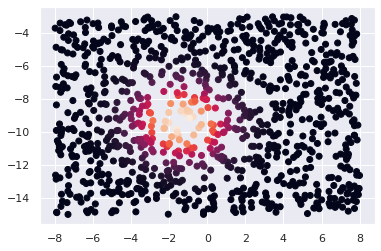

In [ ]:
fig, ax = plt.subplots()
ax.scatter(Xnew[:, 0], Xnew[:, 1], c=probs)